<a href="https://colab.research.google.com/github/MSIMulti/AIFFEL_quest_cr/blob/master/Exploration/Ex03/exploration_03_MansoonIm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
!pip install mediapipe

no_bg_image.png 처리 완료. 저장: /content/sample_data/exploration_03/output/portrait_no_bg_image.png


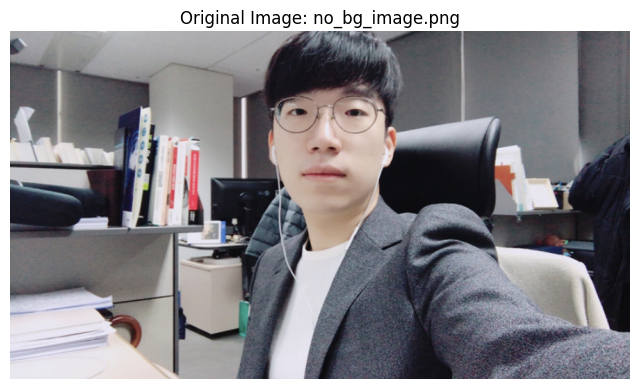

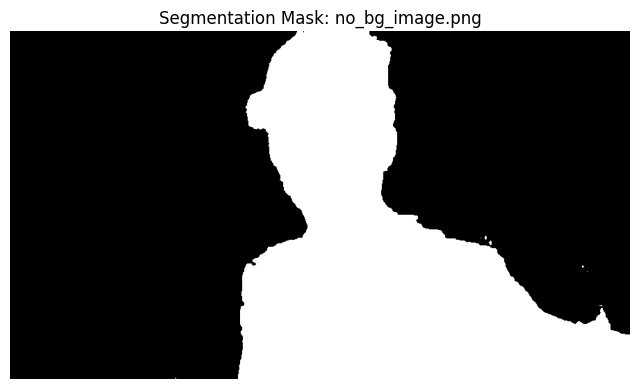

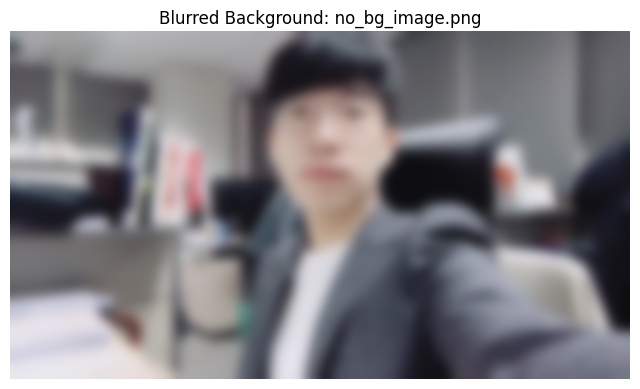

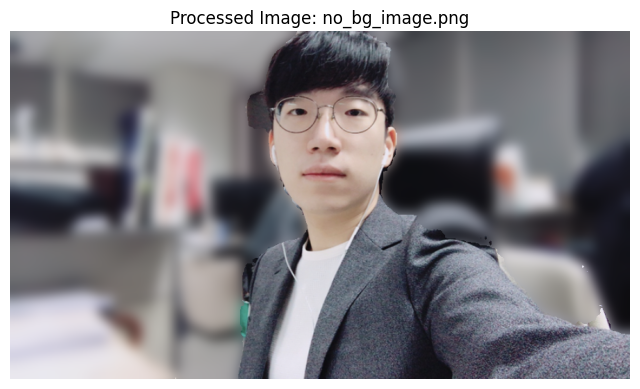

20241119_135825.jpg 처리 완료. 저장: /content/sample_data/exploration_03/output/portrait_20241119_135825.jpg


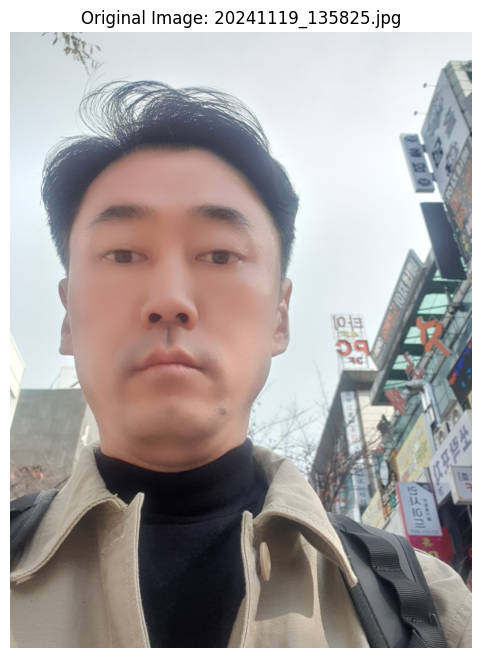

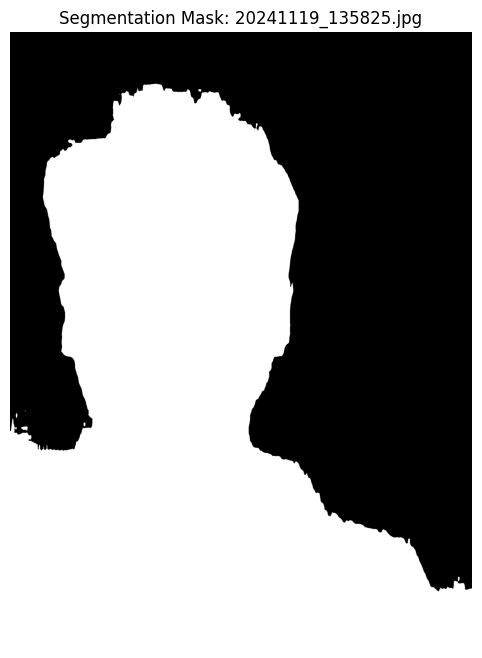

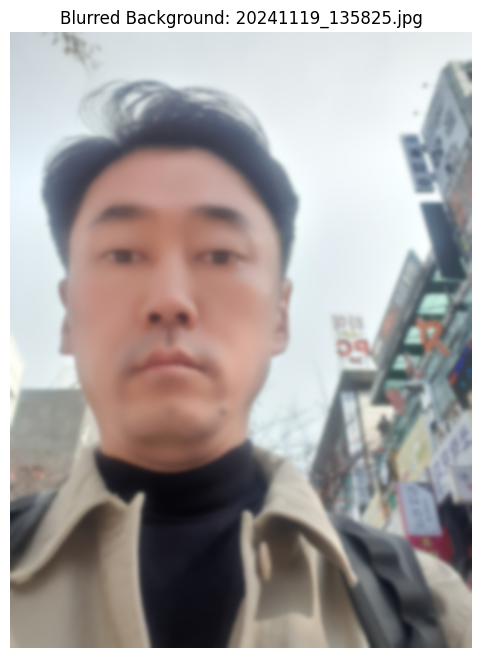

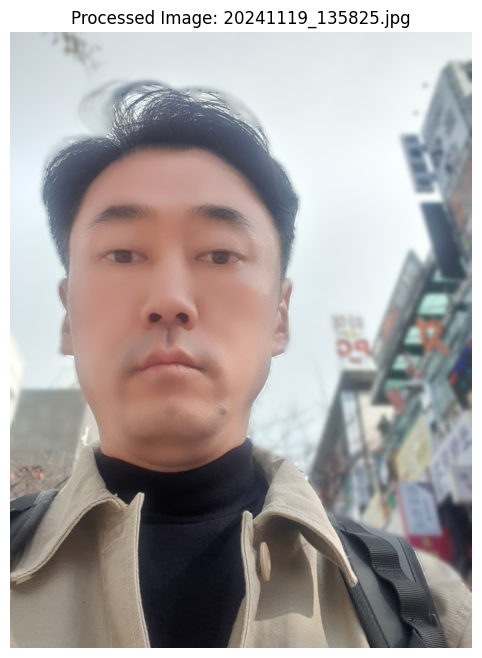

In [23]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# 이미지 폴더 경로 설정
image_folder = '/content/sample_data/exploration_03/image'
output_folder = '/content/sample_data/exploration_03/output'

# 출력 폴더가 없다면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# MediaPipe Selfie Segmentation 초기화
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# 이미지 처리
for image_name in os.listdir(image_folder):
    # 이미지 경로 설정
    img_path = os.path.join(image_folder, image_name)

    # 이미지 읽기
    image = cv2.imread(img_path)

    # 이미지가 읽히지 않으면 건너뛰기
    if image is None:
        print(f"이미지 {image_name}를 읽을 수 없습니다. 건너뜁니다.")
        continue

    # 셀피 세그멘테이션 처리 (이미지 -> RGB 변환 후 처리)
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # 세그멘테이션 마스크 추출 (배경, 인물)
    mask = results.segmentation_mask > 0.5  # 마스크 값이 0.5보다 큰 영역만 사용
    mask = mask.astype(np.uint8) * 255  # 0과 255로 변환 (흑백 마스크)

    # 배경 흐림 처리 (GaussianBlur)
    blurred_bg = cv2.GaussianBlur(image, (55, 55), 0)

    # 마스크와 배경 흐림을 결합하여 최종 이미지 생성
    mask_3ch = cv2.merge([mask, mask, mask])  # 마스크를 3채널로 확장
    output_image = np.where(mask_3ch == 255, image, blurred_bg)  # 마스크가 255인 영역은 원본 이미지, 나머지 배경 흐림

    # 처리된 이미지 저장
    output_path = os.path.join(output_folder, f"portrait_{image_name}")
    cv2.imwrite(output_path, output_image)
    print(f"{image_name} 처리 완료. 저장: {output_path}")

    # 중간 처리과정 이미지 출력
    # 1. 원본 이미지
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Original Image: {image_name}")
    plt.show()

    # 2. 세그멘테이션 마스크
    plt.figure(figsize=(8, 8))
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.title(f"Segmentation Mask: {image_name}")
    plt.show()

    # 3. 흐림 처리된 배경
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(blurred_bg, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Blurred Background: {image_name}")
    plt.show()

    # 4. 최종 처리된 이미지
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # BGR -> RGB 변환
    plt.axis('off')
    plt.title(f"Processed Image: {image_name}")
    plt.show()
